In [6]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import tqdm

In [7]:
img = cv2.imread("/content/image.jpg")
img = imutils.resize(img, width=1024)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

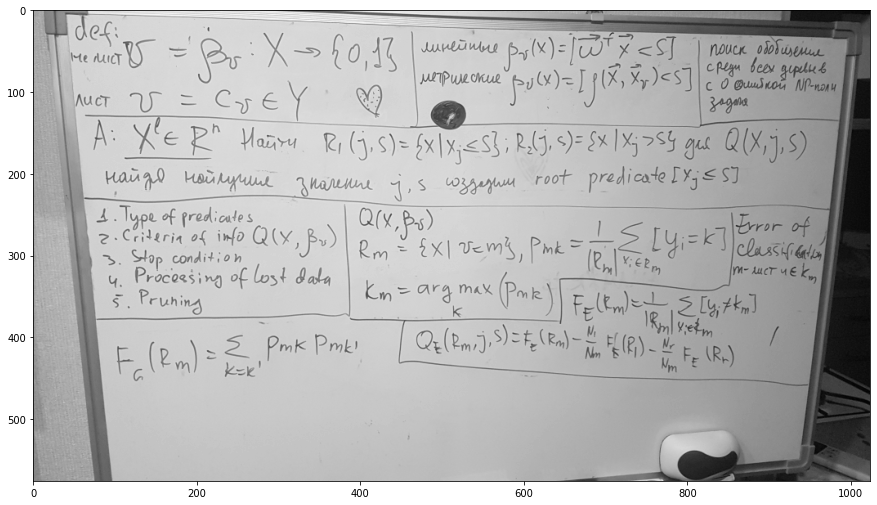

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(img, cmap="gray")

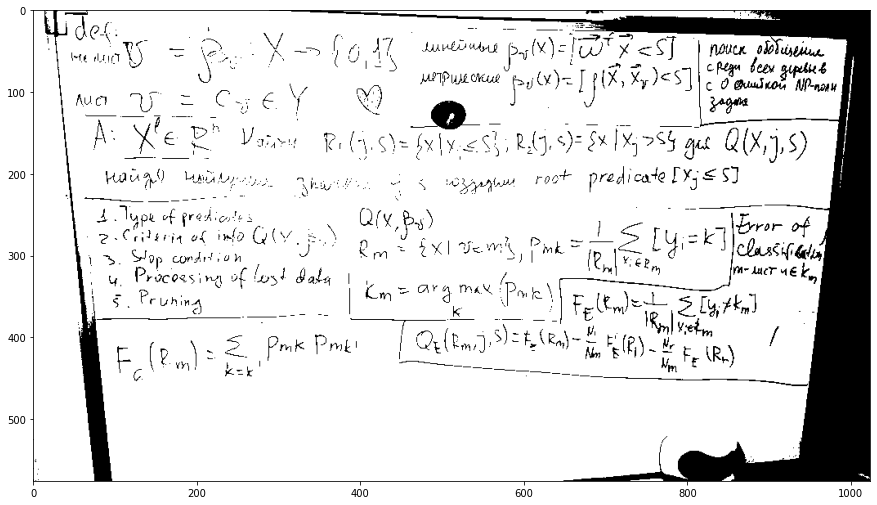

In [9]:
# print(img[:10])
bin_img = (img/255>0.5).astype(np.int)
plt.figure(figsize=(15,15))
plt.imshow(bin_img,cmap="gray")

In [10]:
height = bin_img.shape[0]
width = bin_img.shape[1]
c2ind = lambda y,x: y*width+x
ind2c = lambda ind: (ind//width,ind%width)

In [11]:
c2ind(100,111)

102511

In [12]:
ind2c(102511)

(100, 111)

In [16]:
!pip install disjoint-set
from disjoint_set import DisjointSet
ds = DisjointSet()

In [18]:
print(ds)

DisjointSet()


In [13]:
res = np.where(bin_img==0)

In [14]:
zero_pairs=set(zip(res[0],res[1]))

In [15]:
len(zero_pairs)

73883

In [16]:
zero_inds = set([c2ind(y,x) for y,x in zero_pairs])

In [19]:
for ind in zero_inds:
    ds.find(ind)

In [20]:
for y,x in tqdm.tqdm(zero_pairs):
    for dy in range(-1,2):
        for dx in range(-1,2):
            if (dx!=0 or dy!=0) and (y+dy,x+dx) in zero_pairs:
                ds.union(c2ind(y,x),c2ind(y+dy,x+dx)) 


100%|██████████| 73883/73883 [00:04<00:00, 18162.18it/s]


In [21]:
from matplotlib import cm
fltr_img = np.ones(shape=(height,width,4))
sets_size = len(list(ds.itersets()))
mycm = cm.get_cmap("seismic",sets_size)

print(sets_size)
for num_set,els in enumerate(ds.itersets()):
    if len(els)<270:
        for ind in els:
            fltr_img[(ind2c(ind))] = mycm(num_set)  
    

1026


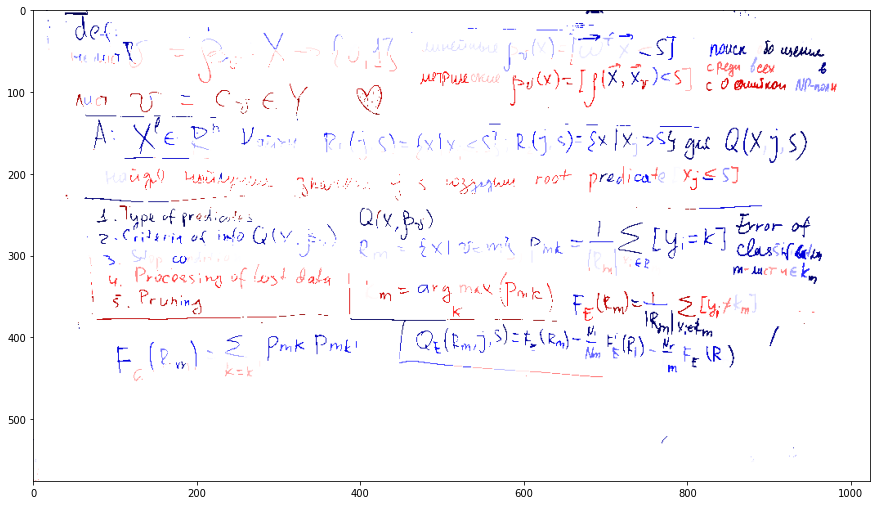

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(fltr_img)

In [ ]:
[len(els) for els in ds.itersets()]

In [29]:
class myDisSets(): 
    def __init__(self):
        self.parent = {}
        self.rank = {}  

    def MakeSet(self, i):        
        self.parent[i] = i  
        self.rank[i] = 0

    def find(self, i):
        if self.parent[i] == i:
            return i
        else:
            self.parent[i] = self.find(self.parent[i])
            return self.parent[i]

    def Union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_i] = root_j
                self.rank[root_j] += 1

    def iterSets(self):
        sets = set(self.parent.values())
        res = []
        for s in tqdm.tqdm(sets):
            seed = set()
            for j in self.parent.keys():
                if (self.parent[j] == s):
                    seed.add(j)
            res.append(seed)
        return res, self.parent

In [30]:
ds = myDisSets()

In [31]:
for ind in zero_inds:
    ds.MakeSet(ind)

In [32]:
for y,x in tqdm.tqdm(zero_pairs):
    for dy in range(-1,2):
        for dx in range(-1,2):
            if (dx!=0 or dy!=0) and (y+dy,x+dx) in zero_pairs:
                ds.Union(c2ind(y,x),c2ind(y+dy,x+dx))

100%|██████████| 73883/73883 [00:03<00:00, 24501.49it/s]


In [35]:
z = ds.iterSets()

100%|██████████| 1757/1757 [00:25<00:00, 67.99it/s]


In [36]:
from matplotlib import cm
fltr_img = np.ones(shape=(height,width,4))
sets_size = len(list(z[0]))
mycm = cm.get_cmap("seismic",sets_size)

print(sets_size)
for num_set,els in enumerate(z[0]):
    if len(els)<270:
        for ind in els:
            fltr_img[(ind2c(ind))] = mycm(num_set)

1757


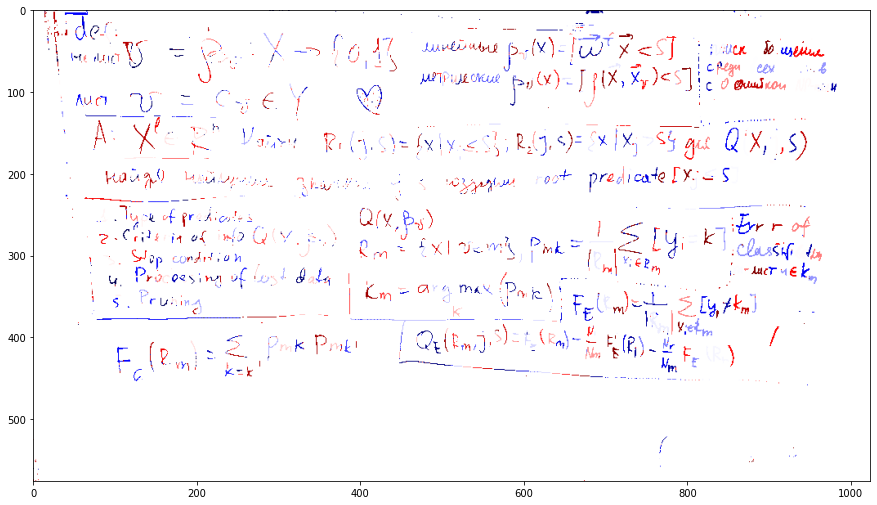

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(fltr_img)

# Homework
* Написать функцию расчета периметра для связанных множеств в ds.itersets()
* Написать фунцию фильтрации на основе периметра
* Построить словарь соотношения площади к периметру(или наоборот) и визуализировать какие объекты попали в этом словарь


a*a/4*a = a/4

pi*r^2/2*pi*r = r/2

h*a/2 / (a+b+c) = ?

[0, C] => [0,1]

[0,0.3]; => viz
[0.3,0.6]; => viz
[0.6,1]; => viz


In [ ]:
#из площади вычитаем внутренние пиксели 
def perimetr(dots):
    P = len(dots)
    figure = [ind2c(d) for d in dots]
    for x in figure: 
        count = 0
        for dx in range(-1,2):
            for dy in range(-1,2):
                #если все точки вокруг фигуры и сама точка содержатся в фигуре, то вычитаем ее из площади
                if (x[0] + dx, x[1] + dy) in figure:
                    count = count + 1
        #всего вокруг точек 8 + 1 (сама точка)
        if (count >= 9):
            P = P - 1
    return P

In [ ]:
#фильтрация на основе периметра
from matplotlib import cm
fltr_img = np.ones(shape=(height,width,4))
sets_size = len(list(z[0]))
mycm = cm.get_cmap("seismic",sets_size)

print(sets_size)
for num_set,els in enumerate(z[0]):
    P = perimetr(els)
    if P<150:
        for ind in els:
            fltr_img[(ind2c(ind))] = mycm(num_set)